* Course    : CS513 - Knowledge Discovery and Data Mining
* First Name: John
* Last Name : Rizzo
* Student ID: 20036833
* Purpose   : CS513_HW_04_CART

Load the “breast-cancer-wisconsin.data.csv” from canvas into R/Python and answer questions 4.1 and 4.2 from the word document.

In [ ]:
# ! python --version
# ! pip install numpy==2.0.2
# ! pip install pydantic-settings
# ! pip install ydata-profiling
# ! pip install pandas
# ! pip install matplotlib
# ! pip install seaborn
# ! pip install scikit-learn

In [3]:
# !pip list

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Problem 4.1

In [ ]:
data = {
    'age': [45, 25, 33, 25, 35, 26, 45, 40, 30, 50, 25],
    'gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M'],
    'occupation': ['Service', 'Service', 'Service', 'Management', 'Management', 'Management', 'Management', 'Sales', 'Sales', 'Staff', 'Staff'],
    'salary': [48000, 25000, 35000, 45000, 65000, 45000, 70000, 50000, 40000, 40000, 25000]
}
df = pd.DataFrame(data)

    age gender  occupation  salary
0    45      F     Service   48000
1    25      M     Service   25000
2    33      M     Service   35000
3    25      M  Management   45000
4    35      F  Management   65000
5    26      M  Management   45000
6    45      F  Management   70000
7    40      F       Sales   50000
8    30      M       Sales   40000
9    50      F       Staff   40000
10   25      M       Staff   25000


In [99]:
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

In [100]:
def age_grouping(age):
    if age <= 30:
        return 0
    elif 31 <= age <= 40:
        return 1
    elif age > 40:
        return 2

df['age'] = df['age'].map(age_grouping)

In [101]:
def salary_grouping(salary):
    if salary<35000:
        return 1
    if salary>=35000 and salary < 45000:
        return 2
    if salary>=45000 and salary < 55000:
        return 3
    elif salary >= 55000:
        return 4
df['salary'] = df['salary'].map(salary_grouping)

In [ ]:
encoder = LabelEncoder()
df['occupation'] = encoder.fit_transform(df['occupation'])

In [105]:
features = ['age', 'gender', 'occupation']
target = 'salary'

X = df[features]
y = df[target]

In [110]:
print(X)

    age  gender  occupation
0     2       0           2
1     0       1           2
2     1       1           2
3     0       1           0
4     1       0           0
5     0       1           0
6     2       0           0
7     1       0           1
8     0       1           1
9     2       0           3
10    0       1           3


[Text(0.34615384615384615, 0.9166666666666666, 'occupation <= 0.5\nentropy = 1.936\nsamples = 11\nvalue = [2, 3, 4, 2]'),
 Text(0.15384615384615385, 0.75, 'gender <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [0, 0, 2, 2]'),
 Text(0.25, 0.8333333333333333, 'True  '),
 Text(0.07692307692307693, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.23076923076923078, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(0.5384615384615384, 0.75, 'age <= 0.5\nentropy = 1.557\nsamples = 7\nvalue = [2, 3, 2, 0]'),
 Text(0.4423076923076923, 0.8333333333333333, '  False'),
 Text(0.38461538461538464, 0.5833333333333334, 'occupation <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1, 0, 0]'),
 Text(0.3076923076923077, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.6923076923076923, 0.5833333333333334, 'occupation

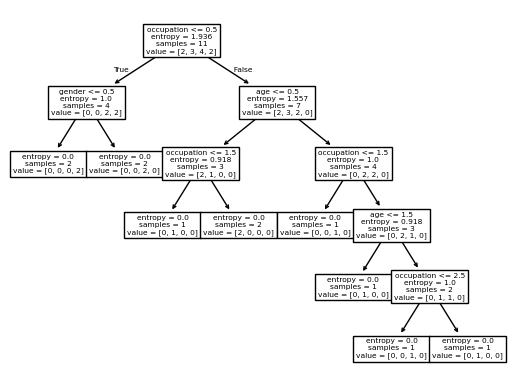

In [109]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

# Problem 4.2

In [111]:
coltype = {
    'Sample': 'Int64',
    'F1': 'Int64',
    'F2': 'Int64',
    'F3': 'Int64',
    'F4': 'Int64',
    'F5': 'Int64',
    'F6': 'Int64',
    'F7': 'Int64',
    'F8': 'Int64',
    'F9': 'Int64',
    'Class': 'Int64'
}

folder = '../data/'

df = pd.read_csv(folder + 'breast-cancer-wisconsin.csv',
                 na_values='?', 
                 dtype=coltype)
df.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [116]:
print(df.isna().sum())


Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [ ]:
# Replacing the missing values with the mean of the column
# this happens for F6
df['F6']=df['F6'].fillna(df['F6'].mean().round())

In [120]:
df

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [126]:
attr = df.drop(['Class'], axis=1)
target = df['Class']
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=6)

In [ ]:
model = DecisionTreeClassifier()
model.fit(attr_train, target_train)

In [129]:
target_pred = model.predict(attr_test)

In [130]:
print(confusion_matrix(target_test, target_pred))

[[131   6]
 [ 11  62]]


In [131]:
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

         2.0       0.92      0.96      0.94       137
         4.0       0.91      0.85      0.88        73

    accuracy                           0.92       210
   macro avg       0.92      0.90      0.91       210
weighted avg       0.92      0.92      0.92       210



In [135]:
plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5595238095238095, 0.9444444444444444, 'F3 <= 3.5\ngini = 0.451\nsamples = 489\nvalue = [321, 168]'),
 Text(0.35714285714285715, 0.8333333333333334, 'F6 <= 5.5\ngini = 0.109\nsamples = 329\nvalue = [310, 19]'),
 Text(0.45833333333333337, 0.8888888888888888, 'True  '),
 Text(0.19047619047619047, 0.7222222222222222, 'F2 <= 3.5\ngini = 0.037\nsamples = 314\nvalue = [308, 6]'),
 Text(0.09523809523809523, 0.6111111111111112, 'F1 <= 5.5\ngini = 0.006\nsamples = 307\nvalue = [306, 1]'),
 Text(0.047619047619047616, 0.5, 'gini = 0.0\nsamples = 299\nvalue = [299, 0]'),
 Text(0.14285714285714285, 0.5, 'F5 <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.09523809523809523, 0.3888888888888889, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.19047619047619047, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.6111111111111112, 'F5 <= 2.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.23809523809523808, 0.5, 'gini = 0.0\nsamples 